# Time Series and Categorical Charts

## Introduction 
In this notebook, I explore how sales change over time using line charts and compare sales performance across categories using bar and pie charts. 
The project also focuses on selecting appropriate chart types, formatting labels and axes, and summarizing insights derived from the visualizations.

These analyses help in understanding trends, category performance, and overall sales distribution.

## Dataset Description

This project uses multiple datasets stored in a single folder.  
The datasets include sales records from different years and customer data from multiple regions.

### Files Included:
- **Salestill2024.csv** – Sales records up to the year 2024  
- **2025sales.csv** – Sales records for the year 2025  
- **customer_central.csv** – Customer data from the Central region  
- **customer_east.csv** – Customer data from the East region  
- **customer_south.csv** – Customer data from the South region  
- **Customer_west.csv** – Customer data from the West region  

Sales datasets are combined to analyze sales trends over time, while customer datasets are combined to compare regional customer distributions.

In [4]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# loading the folder
data_folder = "Sales_Performance"

In [5]:
# Loading the Dataset

customer_files = [
    "Customer_central.csv",
    "Customer_east.csv",
    "Customer_south.csv",
    "Customer_west.csv"
]

customers = pd.concat(
    [pd.read_csv(os.path.join(data_folder, file)) for file in customer_files],
    ignore_index=True
)

In [6]:
customers.columns

Index(['Customer_ID', 'Customer_Name', 'Segment', 'Age', 'Country', 'City',
       'State', 'Postal_Code', 'Region'],
      dtype='object')

In [7]:
sales_files = [
    "2025sales.csv",
    "Salestill2024.csv"
]
sales = pd.concat(
    [pd.read_csv(os.path.join(data_folder, file)) for file in sales_files],
    ignore_index=True
)

In [8]:
sales.columns

Index(['Order_Line', 'Order_ID', 'Bar_code_value', 'Order_Date', 'Ship_Date',
       'Ship_Mode', 'Customer_ID', 'Product_ID', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

## Data Integration

To enrich the sales data with customer information, the combined sales dataset is merged with the combined customer dataset using a common `customer_id`.  
This allows for analysis of sales trends by customer region and other customer attributes.

In [10]:
combined_df = pd.merge(
    sales,
    customers,
    on="Customer_ID",
    how="left"
)

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Line      10000 non-null  object 
 1   Order_ID        9999 non-null   object 
 2   Bar_code_value  9999 non-null   float64
 3   Order_Date      9999 non-null   object 
 4   Ship_Date       9999 non-null   object 
 5   Ship_Mode       9999 non-null   object 
 6   Customer_ID     9999 non-null   object 
 7   Product_ID      9999 non-null   object 
 8   Sales           9999 non-null   float64
 9   Quantity        9999 non-null   float64
 10  Discount        9999 non-null   float64
 11  Profit          9999 non-null   float64
 12  Customer_Name   9999 non-null   object 
 13  Segment         9999 non-null   object 
 14  Age             9999 non-null   float64
 15  Country         9999 non-null   object 
 16  City            9999 non-null   object 
 17  State           9999 non-null   

From the results above: the combined dataset contains 10,000 records and 20 features. A small number of missing values (1 per affected column) were observed. 
Some data types required correction, particularly date fields stored as objects and identifier field incorrectly represented as numeric values. 
These issues were addressed during the data cleaning stage below.

In [13]:
combined_df.head()

,Order_Line,Order_ID,Bar_code_value,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Quantity,Discount,Profit,Customer_Name,Segment,Age,Country,City,State,Postal_Code,Region
0,7952,OF-2023-164959,98365963.0,1/1/2025,5/1/2025,Standard Class,KN-16390,OFF-LA-10004272,8.67,3.0,0.0,4.0749,Katherine Nockton,Corporate,43.0,United States,Los Angeles,California,90004.0,West
1,7953,OF-2023-156818,78358033.0,1/1/2025,3/1/2025,Second Class,JD-16015,TEC-AC-10002323,132.60,6.0,0.0,17.2380,Joy Daniels,Consumer,23.0,United States,Chicago,Illinois,60610.0,Central
2,7954,OF-2023-127656,29106221.0,1/1/2025,7/1/2025,Standard Class,NW-18400,OFF-AR-10001166,30.32,4.0,0.0,11.8248,Natalie Webber,Consumer,29.0,United States,Tigard,Oregon,97224.0,West
3,7955,OF-2023-162015,64360984.0,1/1/2025,8/1/2025,Standard Class,KB-16240,TEC-AC-10003832,1287.45,5.0,0.0,244.6155,Karen Bern,Corporate,42.0,United States,Los Angeles,California,90036.0,West
4,7956,OF-2023-162015,13758768.0,1/1/2025,8/1/2025,Standard Class,KB-16240,OFF-AP-10003040,168.10,5.0,0.0,43.7060,Karen Bern,Corporate,42.0,United States,Los Angeles,California,90036.0,West


### Data Cleaning

In [15]:
# showing only columns with missing values
combined_df.isnull().sum()[combined_df.isnull().sum() > 0]

Order_ID          1
Bar_code_value    1
Order_Date        1
Ship_Date         1
Ship_Mode         1
Customer_ID       1
Product_ID        1
Sales             1
Quantity          1
Discount          1
Profit            1
Customer_Name     1
Segment           1
Age               1
Country           1
City              1
State             1
Postal_Code       1
Region            1
dtype: int64

In [16]:
# viewing the actual row with missing data
combined_df[combined_df.isnull().any(axis = 1)]

,Order_Line,Order_ID,Bar_code_value,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Quantity,Discount,Profit,Customer_Name,Segment,Age,Country,City,State,Postal_Code,Region
9999,********** This file ends here********,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# dropping missing row
combined_df = combined_df.dropna()

### Order_Date and Ship_Date columns contained mixed formats (DD-MM-YYYY and DD/MM/YYYY). 
A custom parser was applied to convert all values to datetime. 
Any remaining invalid dates were removed, ensuring a clean dataset for analysis.

In [19]:
# Order_Date and Ship_Date should be datetime not text
# Convert Order_Date safely
from datetime import datetime
import pandas as pd

def parse_mixed_dates(date_str):
    for fmt in ("%d-%m-%Y", "%d/%m/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT  # if it doesn't match any format

In [20]:
combined_df["Order_Date"] = combined_df["Order_Date"].apply(parse_mixed_dates)
combined_df["Ship_Date"] = combined_df["Ship_Date"].apply(parse_mixed_dates)

In [21]:
# Quantity should be whole numbers(integer) not float
combined_df["Quantity"] = combined_df["Quantity"].astype(int)

In [22]:
# Age should be whole numbers(integer) not float
combined_df["Age"] = combined_df["Age"].astype(int)

In [23]:
# Postal_Code are identifiers, not numbers i.e no math shouold be done on them and leading zeros can be lost if numbers
combined_df["Postal_Code"] = combined_df["Postal_Code"].astype(str)

In [24]:
# Bar_code_value are identifiers i.e no math shouold be done on them and leading zeros can be lost if numbers
combined_df["Bar_code_value"] = combined_df["Bar_code_value"].astype(int)

In [25]:
# Ensure Order_Date is datetime
combined_df["Order_Date"] = pd.to_datetime(combined_df["Order_Date"])

# Extract Year and Month
combined_df["Order_Year"] = combined_df["Order_Date"].dt.year
combined_df["Order_Month"] = combined_df["Order_Date"].dt.month
combined_df["Order_Month_Name"] = combined_df["Order_Date"].dt.strftime("%b")

In [26]:
#Checking for validaton
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Line        9999 non-null   object        
 1   Order_ID          9999 non-null   object        
 2   Bar_code_value    9999 non-null   int32         
 3   Order_Date        9999 non-null   datetime64[ns]
 4   Ship_Date         9999 non-null   datetime64[ns]
 5   Ship_Mode         9999 non-null   object        
 6   Customer_ID       9999 non-null   object        
 7   Product_ID        9999 non-null   object        
 8   Sales             9999 non-null   float64       
 9   Quantity          9999 non-null   int32         
 10  Discount          9999 non-null   float64       
 11  Profit            9999 non-null   float64       
 12  Customer_Name     9999 non-null   object        
 13  Segment           9999 non-null   object        
 14  Age               9999 non-nu

In [27]:
combined_df.head()

,Order_Line,Order_ID,Bar_code_value,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Quantity,...,Segment,Age,Country,City,State,Postal_Code,Region,Order_Year,Order_Month,Order_Month_Name
0,7952,OF-2023-164959,98365963,2025-01-01,2025-01-05,Standard Class,KN-16390,OFF-LA-10004272,8.67,3,...,Corporate,43,United States,Los Angeles,California,90004.0,West,2025,1,Jan
1,7953,OF-2023-156818,78358033,2025-01-01,2025-01-03,Second Class,JD-16015,TEC-AC-10002323,132.60,6,...,Consumer,23,United States,Chicago,Illinois,60610.0,Central,2025,1,Jan
2,7954,OF-2023-127656,29106221,2025-01-01,2025-01-07,Standard Class,NW-18400,OFF-AR-10001166,30.32,4,...,Consumer,29,United States,Tigard,Oregon,97224.0,West,2025,1,Jan
3,7955,OF-2023-162015,64360984,2025-01-01,2025-01-08,Standard Class,KB-16240,TEC-AC-10003832,1287.45,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan
4,7956,OF-2023-162015,13758768,2025-01-01,2025-01-08,Standard Class,KB-16240,OFF-AP-10003040,168.10,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan


# ANALYSIS

## 1️⃣ Line Chart – Overall Monthly Sales Trend

Why this chart was chosen
A line chart is ideal for showing continuous changes over time. Monthly sales data represents a time series, and a line chart makes it easy to observe long-term trends, seasonality, and fluctuations.

What it shows
Overall sales movement across all months
Periods of growth, decline, or stability
Formatting choices
Markers added to highlight individual months
Clear axis labels (Month, Total Sales)
Gridlines enabled for easier trend reading

C:\Users\HP\AppData\Local\Temp\ipykernel_42948\165130018.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = combined_df.groupby(pd.Grouper(key="Order_Date", freq="M"))["Sales"].sum().reset_index()


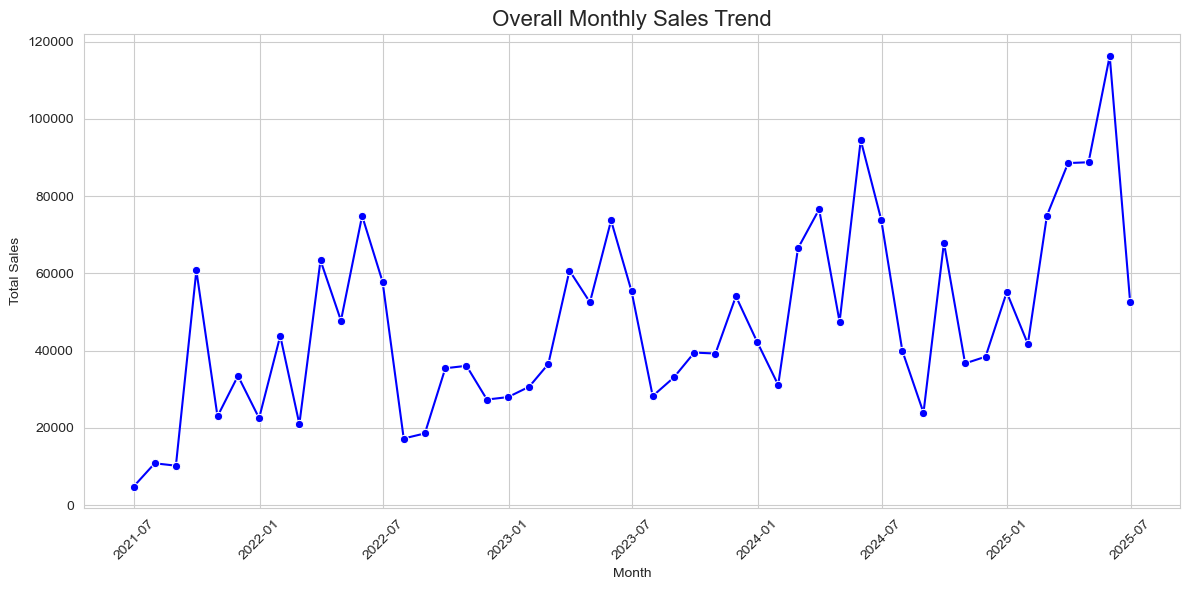

In [30]:
# Set style
sns.set_style("whitegrid")

# Monthly aggregation
monthly_sales = combined_df.groupby(pd.Grouper(key="Order_Date", freq="M"))["Sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Order_Date", y="Sales", marker="o", color="blue")
plt.title("Overall Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Overall Monthly_Sales_Trend.png") 
plt.show()

2️⃣ Line Chart – Yearly Sales Trend (2021–2025)

Why this chart was chosen
A yearly line chart provides a high-level summary of performance over multiple years. It helps stakeholders quickly assess business growth or decline over time.

What it shows
One aggregated sales value per year
Long-term business direction from 2021 to 2025
Formatting choices
Year displayed as discrete x-axis values
Markers used to emphasize yearly data points
Clean layout to avoid overcrowding

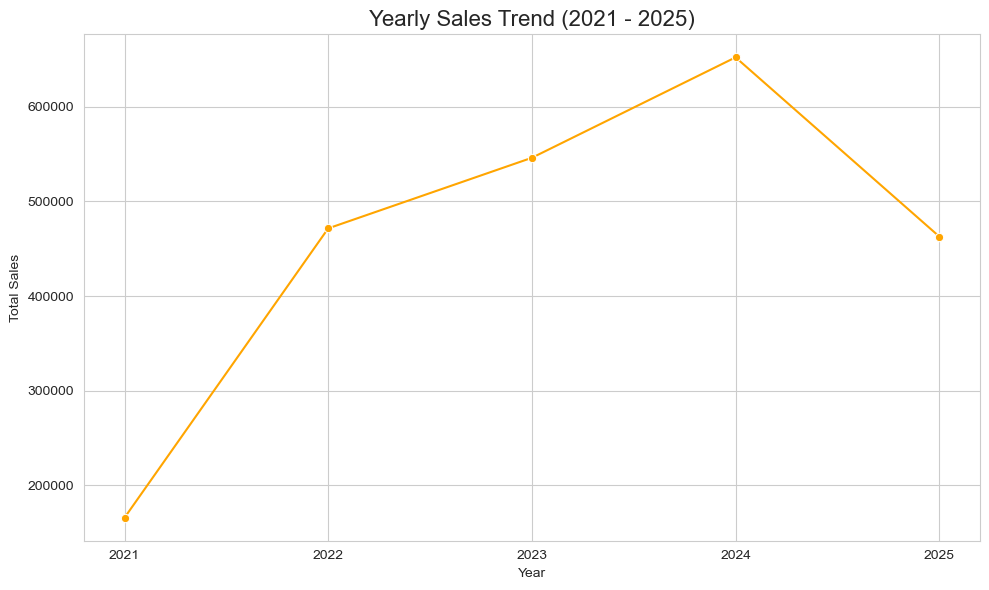

In [32]:
sns.set_style("whitegrid")

# Aggregate yearly profit using Order_Year
yearly_sales = combined_df.groupby("Order_Year")["Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_sales, x="Order_Year", y="Sales", marker="o", color="orange")
plt.title("Yearly Sales Trend (2021 - 2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(yearly_sales["Order_Year"])  # ensures all years are shown
plt.tight_layout()
plt.savefig("Yearly_Sales_Trend.png")
plt.show()

3️⃣ Line Chart – Quarterly Sales Trend

Why this chart was chosen
Quarterly analysis balances detail and clarity by reducing monthly noise while still showing intra-year patterns.

What it shows
Sales performance per quarter
Seasonal and cyclical patterns across years
Formatting choices
Quarters clearly labeled (Q1–Q4)
Consistent color scheme with other line charts
Rotated axis labels where needed for readability

C:\Users\HP\AppData\Local\Temp\ipykernel_42948\1563523216.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = combined_df.groupby(pd.Grouper(key="Order_Date", freq="Q"))["Sales"].sum().reset_index()


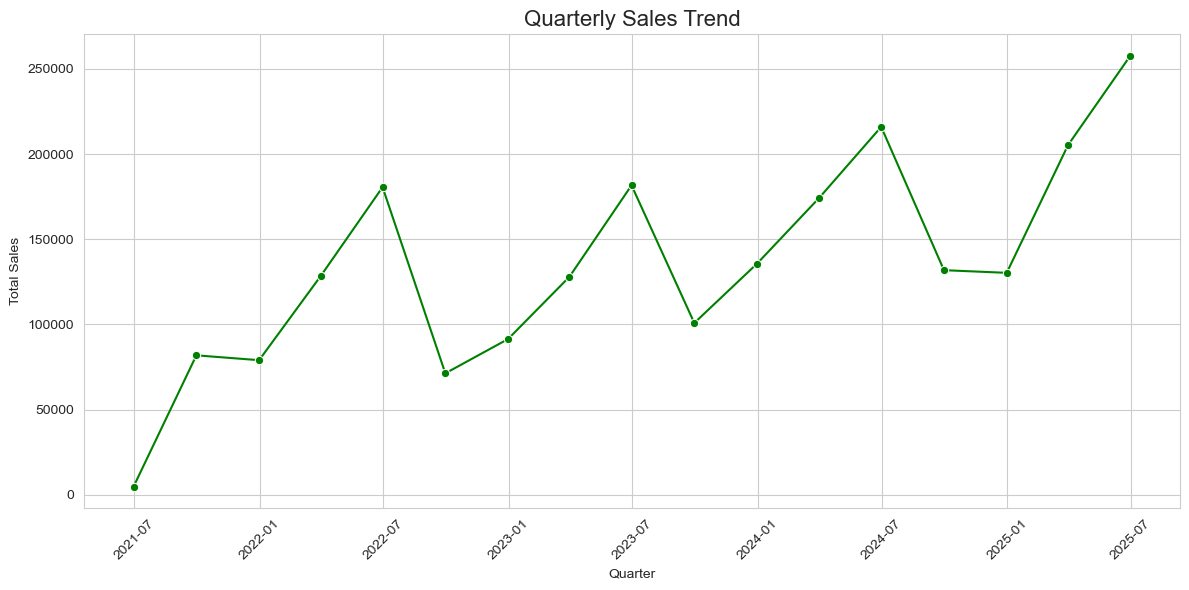

In [34]:
# Set style
sns.set_style("whitegrid")

# Quarterly aggregation
quarterly_sales = combined_df.groupby(pd.Grouper(key="Order_Date", freq="Q"))["Sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=quarterly_sales, x="Order_Date", y="Sales", marker="o", color="green")
plt.title("Quarterly Sales Trend", fontsize=16)
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Quarterly_Sales_Trend.png")
plt.show()

4️⃣ Line Chart – Monthly Sales Trend for Year 2025

Why this chart was chosen
Focusing on a single year allows deeper insight into recent performance without distraction from historical data.

What it shows
Month-by-month sales movement for 2025
Short-term trends and anomalies
Formatting choices
Month names displayed in calendar order
Line markers used for each month
Emphasis on clarity and readability

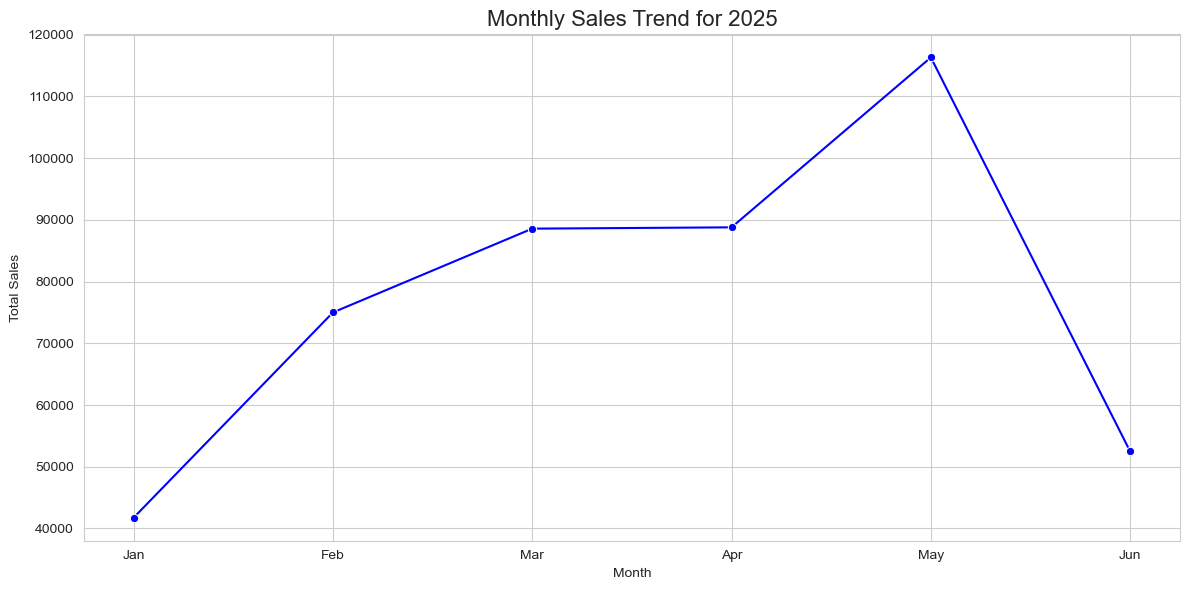

In [36]:
# Filter for 2025
df_2025 = combined_df[combined_df["Order_Year"] == 2025]

# Aggregate monthly sales using Order_Month_Name
monthly_2025 = df_2025.groupby("Order_Month_Name")["Sales"].sum().reindex(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_2025, x="Order_Month_Name", y="Sales", marker="o", color="blue")
plt.title("Monthly Sales Trend for 2025", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("Monthly_Sales_2025.png")
plt.show()

## Bar Charts - Compare Categories
Why bar chart:
Ideal for comparing discrete categories
Easy to read values per category

5️⃣ Bar Chart – Sales by Segment

Why this chart was chosen
Bar charts are best for comparing values across categories. Sales by segment requires clear comparison between discrete business segments.
                   
What it shows
Which customer segments generate the most sales
Formatting choices
Bars sorted for easier comparison
Distinct colors for visual separation
Value labels added for precise interpretation

C:\Users\HP\AppData\Local\Temp\ipykernel_42948\417100204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Segment_sales, x="Segment", y="Sales", palette="viridis")


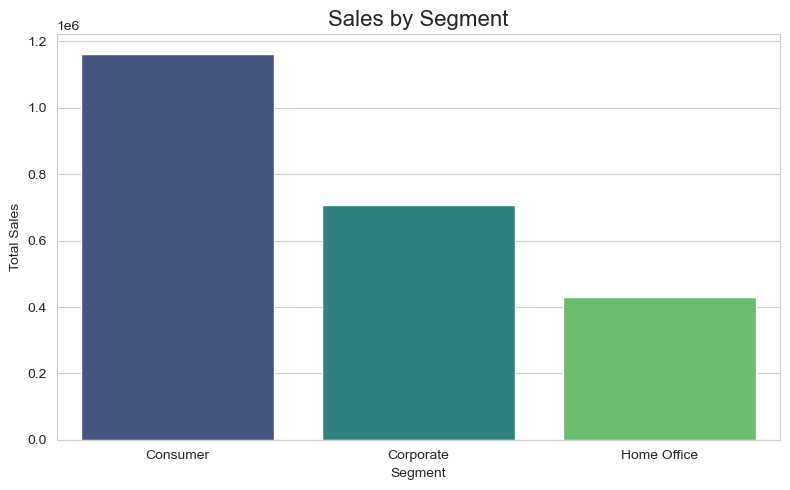

In [39]:
# Total sales per Segment
Segment_sales = combined_df.groupby("Segment")["Sales"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=Segment_sales, x="Segment", y="Sales", palette="viridis")
plt.title("Sales by Segment", fontsize=16)
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("Segment_Sales_Bar.png")
plt.show()

6️⃣ Bar Chart – Sales by Region

Why this chart was chosen
A bar chart makes it easy to compare regional performance side by side.
    
What it shows
Regional contribution to total sales
Formatting choices
Consistent scale across regions
Clear axis labels and title
Rotated labels where necessary to avoid overlap

C:\Users\HP\AppData\Local\Temp\ipykernel_42948\196620769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Region_sales, x="Region", y="Sales", palette="viridis")


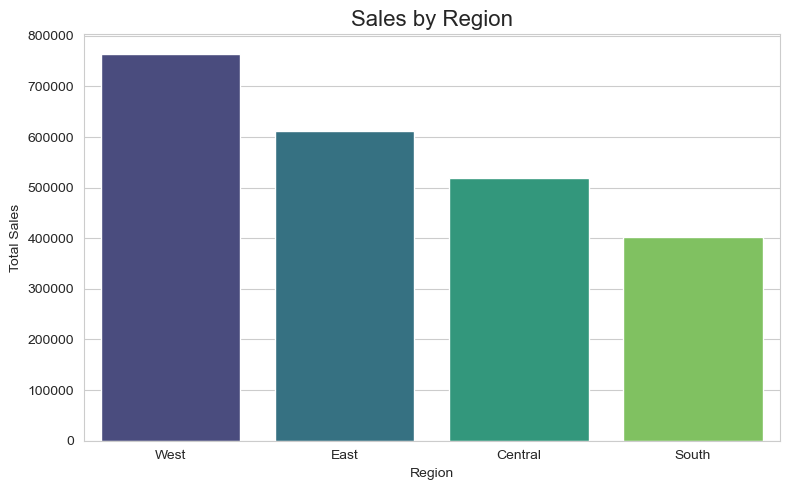

In [41]:
# Total Sales per Region
Region_sales = combined_df.groupby("Region")["Sales"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=Region_sales, x="Region", y="Sales", palette="viridis")
plt.title("Sales by Region", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("Region_Sales_Bar.png")
plt.show()

7️⃣ Bar Chart – Sales by Shipping Mode

Why this chart was chosen
Shipping modes are discrete categories, making a bar chart ideal for direct comparison.
    
What it shows
Sales volume associated with each shipping method
Formatting choices
Uniform bar width
Clean legend and axis titles
Neutral color palette to avoid visual bias

C:\Users\HP\AppData\Local\Temp\ipykernel_42948\251722492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Shipping_Mode_sales, x="Ship_Mode", y="Sales", palette="viridis")


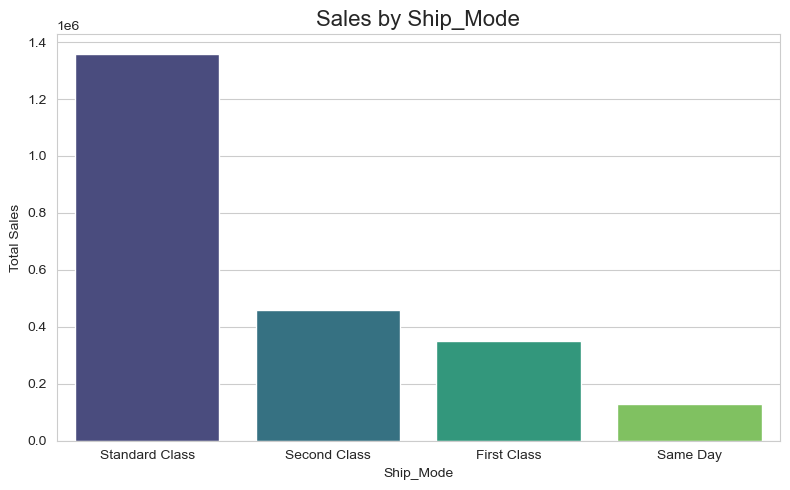

In [43]:
# Total sales per Shipping Mode
Shipping_Mode_sales = combined_df.groupby("Ship_Mode")["Sales"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=Shipping_Mode_sales, x="Ship_Mode", y="Sales", palette="viridis")
plt.title("Sales by Ship_Mode", fontsize=16)
plt.xlabel("Ship_Mode")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("Ship_Mode_Sales_Bar.png")
plt.show()

## Pie Charts - Share of Categories
Why pie chart:
Shows proportional contribution of each category
Best for illustrating relative share, not trends over time

8️⃣ Pie Chart – Profit Share by Region

Why this chart was chosen
Pie charts are effective for showing proportional contribution when the number of categories is small.
    
What it shows
Each region’s share of total profit
Formatting choices
Percentage labels displayed on slices
Start angle adjusted for better balance
Limited categories to avoid clutter

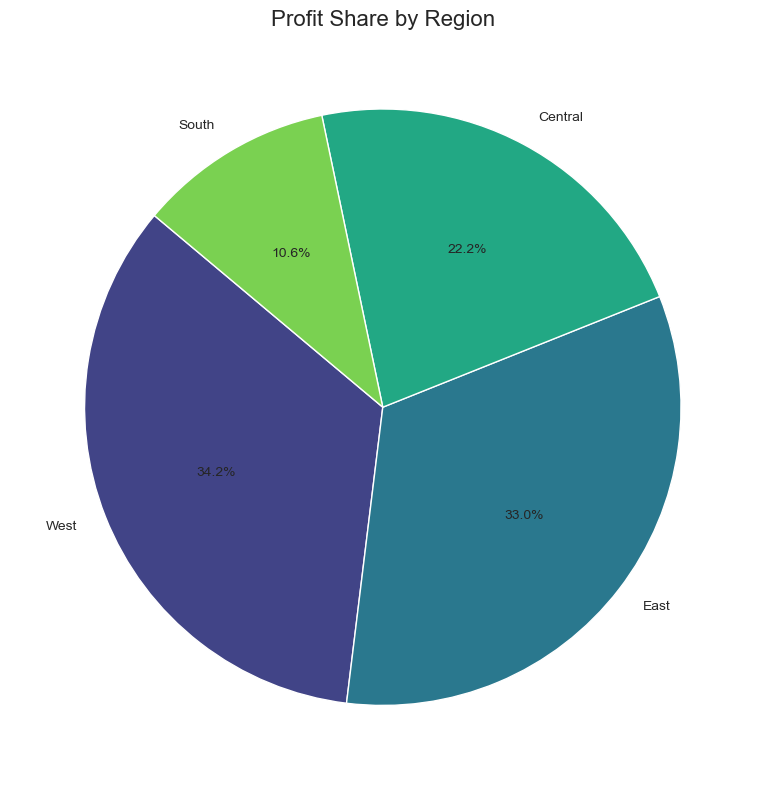

In [46]:
# Total profit per Region
Region_profit = combined_df.groupby("Region")["Profit"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,8))
plt.pie(Region_profit["Profit"], labels=Region_profit["Region"], 
        autopct="%1.1f%%", startangle=140, colors=sns.color_palette("viridis", len(Region_profit)))
plt.title("Profit Share by Region", fontsize=16)
plt.tight_layout()
plt.savefig("Region_Profit_Pie.png")
plt.show()

9️⃣ Doughnut Chart – Profit Share by Shipping Mode

Why this chart was chosen
A doughnut chart provides the same proportional insight as a pie chart but with improved aesthetics and readability.

What it shows
Profit contribution of each shipping mode
Formatting choices
Central hollow space for cleaner appearance
Percentage labels on each segment
Consistent color scheme with other charts

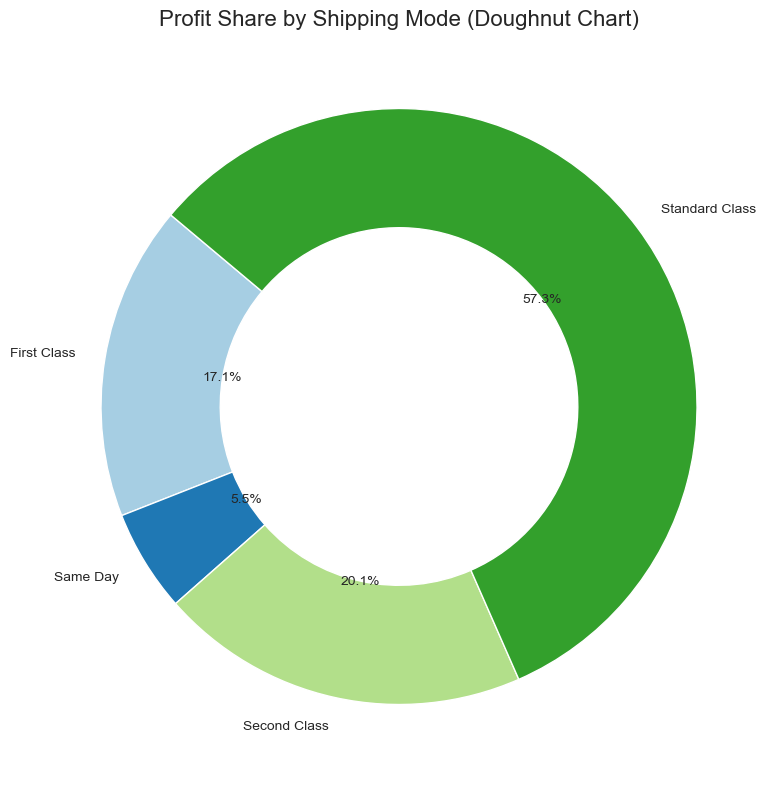

In [48]:
shipping_profit = combined_df.groupby("Ship_Mode")["Profit"].sum().reset_index()

plt.figure(figsize=(8,8))
colors = sns.color_palette("Paired", len(shipping_profit))
plt.pie(shipping_profit["Profit"], labels=shipping_profit["Ship_Mode"], autopct="%1.1f%%", startangle=140, colors=colors, wedgeprops=dict(width=0.4))
plt.title("Profit Share by Shipping Mode (Doughnut Chart)", fontsize=16)
plt.tight_layout()
plt.savefig("Profit_by_Shipping_Mode_Doughnut.png")
plt.show()

## Short Summary

In [50]:
# Aggregate monthly sales and include month name
Monthly_Sales = combined_df.groupby(["Order_Year","Order_Month","Order_Month_Name"])["Sales"].sum().reset_index()

summary_text = f"""
Sales Summary:
- Total sales: {combined_df['Sales'].sum():,.2f}
- Number of months: {Monthly_Sales.shape[0]}
- Highest sales month: {Monthly_Sales.loc[Monthly_Sales['Sales'].idxmax(), 'Order_Month_Name']} {Monthly_Sales.loc[Monthly_Sales['Sales'].idxmax(), 
'Order_Year']}
- Highest sales segment: {Segment_sales.iloc[0]['Segment']}
"""

with open("Sales_Summary.txt", "w") as f:
    f.write(summary_text)

print(summary_text)


Sales Summary:
- Total sales: 2,298,577.23
- Number of months: 49
- Highest sales month: May 2025
- Highest sales segment: Consumer

